In [20]:
import foolbox
import keras
import numpy as np
from keras.applications.resnet50 import ResNet50
import pandas as pd
# if you use Jupyter notebooks
%matplotlib inline
from keras.models import load_model

import matplotlib.pyplot as plt

# instantiate model
keras.backend.set_learning_phase(0)
kmodel = ResNet50(weights='imagenet')
preprocessing = (np.array([104, 116, 123]), 1)
fmodel = foolbox.models.KerasModel(kmodel, bounds=(0, 255), preprocessing=preprocessing)

# get source image and label
image, label = foolbox.utils.imagenet_example()

# apply attack on source image
# ::-1 reverses the color channels, because Keras ResNet50 expects BGR instead of RGB
attack = foolbox.attacks.FGSM(fmodel)
adversarial = attack(image[:, :, ::-1], label)

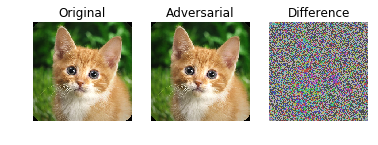

In [31]:
def plotAdvOri(original,adversarial):

    plt.figure()

    plt.subplot(1, 3, 1)
    plt.title('Original')
    plt.imshow(original)  # division by 255 to convert [0, 255] to [0, 1]
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title('Adversarial')
    plt.imshow(adversarial )  # ::-1 to convert BGR to RGB
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title('Difference')
    difference = adversarial- original
    plt.imshow(difference / abs(difference).max() * 0.2 + 0.5)
    plt.axis('off')

    plt.show()

plotAdvOri(image/255,adversarial[:, :, ::-1]/255)

In [3]:
image.shape

(224, 224, 3)

In [4]:
adversarial[:, :, ::-1].shape

(224, 224, 3)